#### 직원 이직 여부 예측

## 1. 환경준비

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [93]:
path = 'https://bit.ly/AttritionFile'
data = pd.read_csv(path)

# 값 변경: Yes/No --> 1/0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

## 2. 데이터 탐색

#### 1) 상/하위 데이터 확인

In [94]:
data.head(3)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7


In [95]:
data.tail(3)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1247,0,29,Non-Travel,Sales,2.0,3,Life Sciences,469,4,Male,...,No,14,1,1,4,3,2,4,3,2
1248,0,43,Travel_Rarely,Sales,16.0,3,Marketing,327,4,Female,...,Yes,22,3,1,22,3,3,17,13,9
1249,0,26,Travel_Rarely,Research & Development,NaN,4,Medical,1177,1,Male,...,No,22,2,1,8,2,3,8,7,7


#### 2) 변수 정보 확인

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int64  
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

#### 3) 기초통계정보 확인

In [97]:
data.describe()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1250.000000,1250.000000,1196.000000,1250.000000,1250.00000,1250.000000,1250.0000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.160000,36.931200,9.258361,2.916800,1030.97120,2.739200,2.7272,2.729600,6525.548000,2.678600,15.216000,2.717600,0.796000,11.33920,2.808000,2.761600,7.117600,4.276000,4.166400
std,0.366753,9.122162,8.166016,1.025436,603.40408,1.096971,0.7102,1.110617,4676.979554,2.473647,3.625556,1.074977,0.851213,7.79687,1.277357,0.715245,6.246966,3.660074,3.610476
min,0.000000,18.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,496.25000,2.000000,2.0000,2.000000,2932.250000,1.000000,12.000000,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,1028.00000,3.000000,3.0000,3.000000,4988.000000,2.000000,14.000000,3.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,1567.00000,4.000000,3.0000,4.000000,8437.500000,4.000000,18.000000,4.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,2068.00000,4.000000,4.0000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.00000,6.000000,4.000000,40.000000,18.000000,17.000000


#### 4) 결측치 확인

In [98]:
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

#### 5) Attrition 변수 확인

In [99]:
data['Attrition'].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

- 데이터 차이가 심하다. (데이터 불균형)
- 예측력에 문제가 될 수 있다.

#### 6) 주요 변수 확인

Attrition

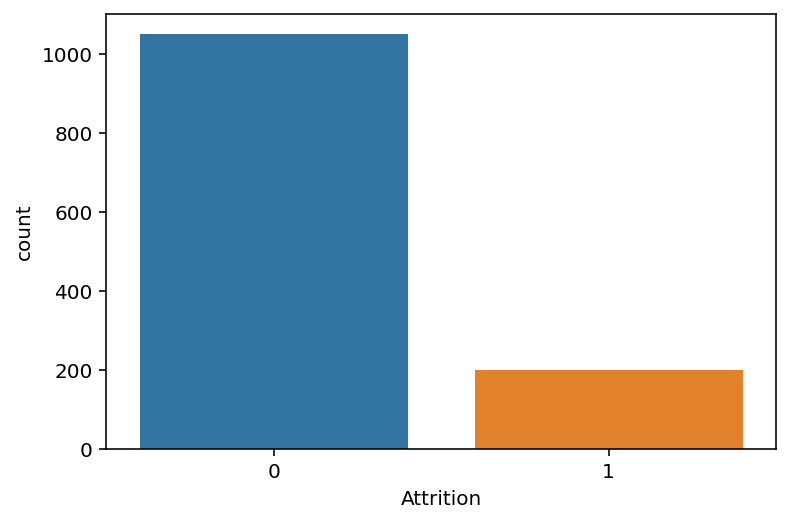

In [100]:
sns.countplot(data=data, x='Attrition')
plt.show()

Age

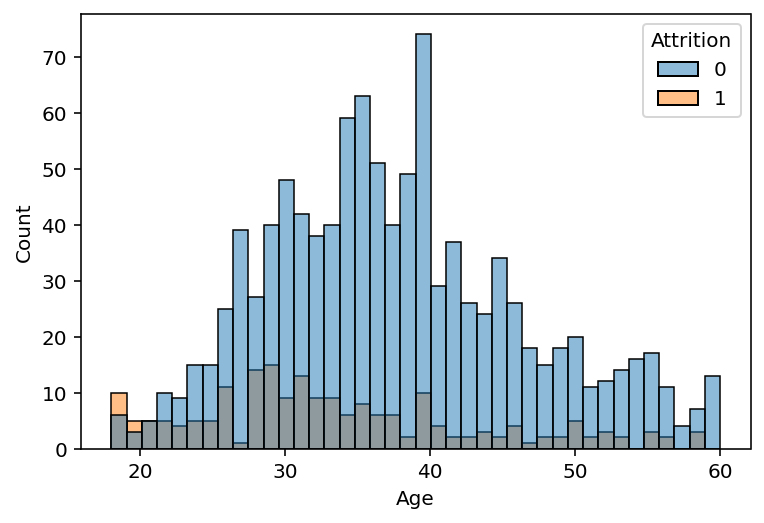

In [101]:
sns.histplot(data=data, x='Age', hue='Attrition', bins=40)
plt.show()

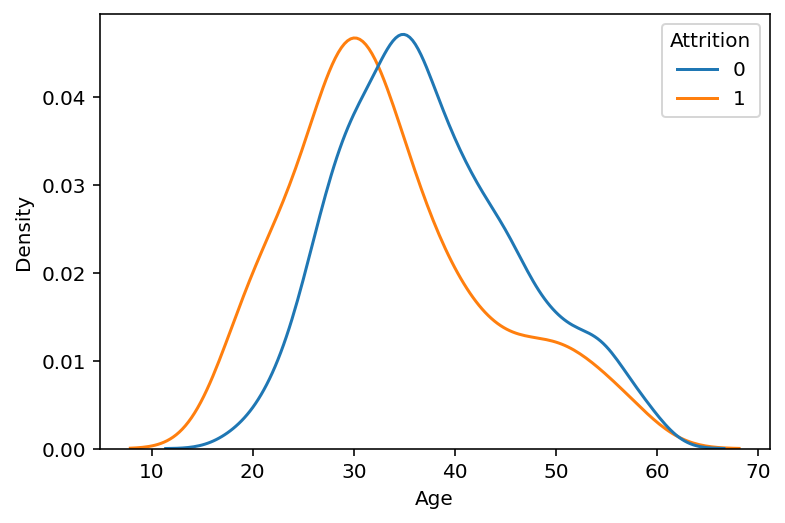

In [102]:
sns.kdeplot(data=data, x='Age', hue='Attrition', common_norm=False)
plt.show()

- 교차되는 지점을 기준으로 나이가 어린 집단의 이탈이 높은 것을 확인

YearsAtCompany

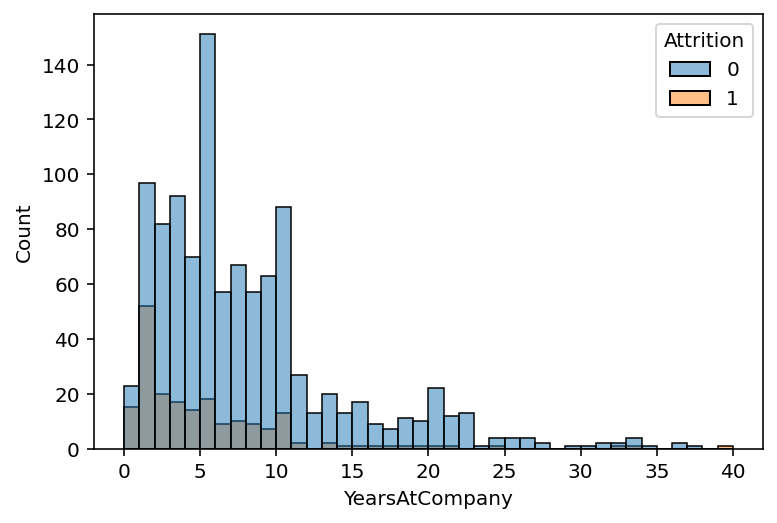

In [103]:
sns.histplot(data=data, x='YearsAtCompany', hue='Attrition', bins=40)
plt.show()

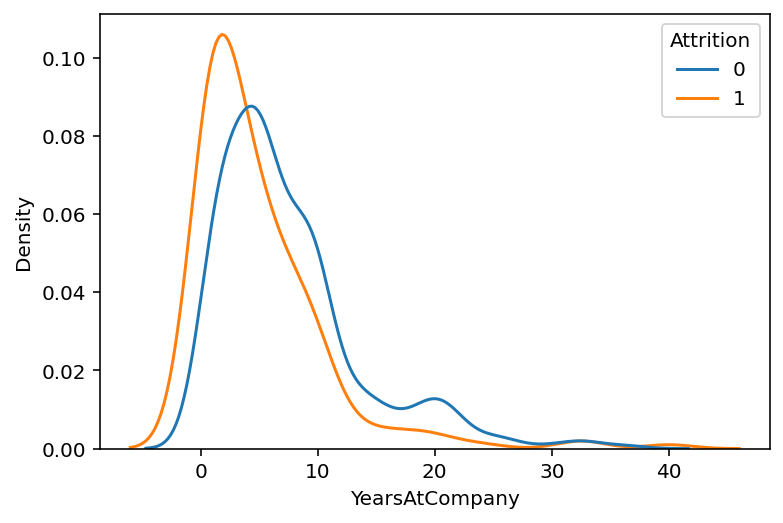

In [104]:
sns.kdeplot(data=data, x='YearsAtCompany', hue='Attrition', common_norm=False)
plt.show()

- 연차가 낮을수록 이탈이 높음.

## 3. 데이터 준비

#### 1) 결측치 처리

In [105]:
# 변수의 가장 빈번한 값으로 변경
fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()

data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

#### 2) x,y 분리

In [106]:
target  = 'Attrition'

x = data.drop(target, axis=1)
y = data[target]

#### 3) 가변수화

In [107]:
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
        'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
        'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

x = pd.get_dummies(x, columns=cols, drop_first=True) # x,y 분리를 먼저 실행해서 x 만 가변수화
x.head(3)

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7.0,817,11691,0.0,11,14,3,13,9,...,0,0,0,1,0,0,0,0,0,1
1,35,18.0,1412,9362,2.0,11,10,2,2,2,...,0,0,1,0,0,0,0,0,1,0
2,42,6.0,1911,13348,9.0,13,18,3,13,7,...,0,1,0,0,1,0,0,0,0,1


#### 4) 정규화

In [108]:
cols = ['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'NumCompaniesWorked', 
      'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsWithCurrManager']

x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())

In [109]:
x.head(3)

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.357143,0.214286,0.394775,0.562507,0.000000,0.000000,0.35,0.500000,0.325,0.500000,...,0,0,0,1,0,0,0,0,0,1
1,0.404762,0.607143,0.682632,0.439863,0.222222,0.000000,0.25,0.333333,0.050,0.111111,...,0,0,1,0,0,0,0,0,1,0
2,0.571429,0.178571,0.924045,0.649763,1.000000,0.142857,0.45,0.500000,0.325,0.388889,...,0,1,0,0,1,0,0,0,0,1


#### 5) train,test 분리

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

## 4. 모델링

#### KNN

In [111]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 선언하기
model = KNeighborsClassifier()

# 학습하기
model.fit(x_train,y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[303  12]
 [ 51   9]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       315
           1       0.43      0.15      0.22        60

    accuracy                           0.83       375
   macro avg       0.64      0.56      0.56       375
weighted avg       0.79      0.83      0.80       375



- recall이 매우 낮은 것을 확인 -> 데이터 불균형이 원인

In [112]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score={}
score['KNN'] = [precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]

#### Logistic Regression

In [113]:
# 불러오기
from sklearn.linear_model import LogisticRegression

# 선언하기
model = LogisticRegression()

# 학습하기
model.fit(x_train,y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[312   3]
 [ 38  22]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       315
           1       0.88      0.37      0.52        60

    accuracy                           0.89       375
   macro avg       0.89      0.68      0.73       375
weighted avg       0.89      0.89      0.87       375



- 여전히 recall이 매우 낮다.

In [114]:
score['Logistic Reg'] = [precision_score(y_test, y_pred),
                         recall_score(y_test, y_pred),
                         accuracy_score(y_test, y_pred)]

#### Random Forest

In [115]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

# 선언하기
model = RandomForestClassifier(random_state=2022)

# 학습하기
model.fit(x_train,y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[314   1]
 [ 55   5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       315
           1       0.83      0.08      0.15        60

    accuracy                           0.85       375
   macro avg       0.84      0.54      0.53       375
weighted avg       0.85      0.85      0.80       375



- 여전히 recall이 매우 낮다.

In [116]:
score['Random Forest'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

#### XGBoost

In [117]:
# 불러오기
from xgboost import XGBClassifier

# 선언하기
model = XGBClassifier(random_state=2022)

# 학습하기
model.fit(x_train,y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[23:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[308   7]
 [ 40  20]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       315
           1       0.74      0.33      0.46        60

    accuracy                           0.87       375
   macro avg       0.81      0.66      0.69       375
weighted avg       0.86      0.87      0.85       375



- recall이 매우 낮음

In [118]:
score['XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

## 5. 정리

In [119]:
score

{'KNN': [0.42857142857142855, 0.15, 0.832],
 'Logistic Reg': [0.88, 0.36666666666666664, 0.8906666666666667],
 'Random Forest': [0.8333333333333334,
  0.08333333333333333,
  0.8506666666666667],
 'XGBoost': [0.7407407407407407, 0.3333333333333333, 0.8746666666666667]}

In [120]:
list(score.keys())

['KNN', 'Logistic Reg', 'Random Forest', 'XGBoost']

## 6. Over/Under Sampling

In [122]:
# 라이브러리 설치
# !pip install imblearn

In [123]:
# 원래 데이터 확인
y.value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

In [124]:
# Over Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

In [125]:
# 확인
y_over.value_counts()

0    1050
1    1050
Name: Attrition, dtype: int64

In [126]:
# Unser Sampling
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids(random_state=2022)
# x_under, y_under = cc.fit_resample(x, y)

In [127]:
# Over Sampling 된 데이터 train,test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  

## 7. 모델링

#### KNN

In [128]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier

# 선언하기
model = KNeighborsClassifier()

# 학습하기
model.fit(x_train,y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[199 106]
 [  4 321]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       305
           1       0.75      0.99      0.85       325

    accuracy                           0.83       630
   macro avg       0.87      0.82      0.82       630
weighted avg       0.86      0.83      0.82       630



In [129]:
# 성능정보 수집
score['KNN_2'] = [precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  accuracy_score(y_test, y_pred)]

#### Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[288  17]
 [ 56 269]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       305
           1       0.94      0.83      0.88       325

    accuracy                           0.88       630
   macro avg       0.89      0.89      0.88       630
weighted avg       0.89      0.88      0.88       630



In [131]:
# 성능정보 수집
score['Logistic Reg_2'] = [precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred),
                           accuracy_score(y_test, y_pred)]

#### Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=2022)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[291  14]
 [ 43 282]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       305
           1       0.95      0.87      0.91       325

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.91      0.91      0.91       630



In [133]:
# 성능정보 수집
score['Random Forest_2'] = [precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                            accuracy_score(y_test, y_pred)]

#### XGBoost

In [134]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=2022)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[23:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[284  21]
 [ 33 292]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       305
           1       0.93      0.90      0.92       325

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.91      0.91      0.91       630



In [135]:
# 성능 정보 수집
score['XGBoost_2'] = [precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred),
                      accuracy_score(y_test, y_pred)]

## 8. 성능비교

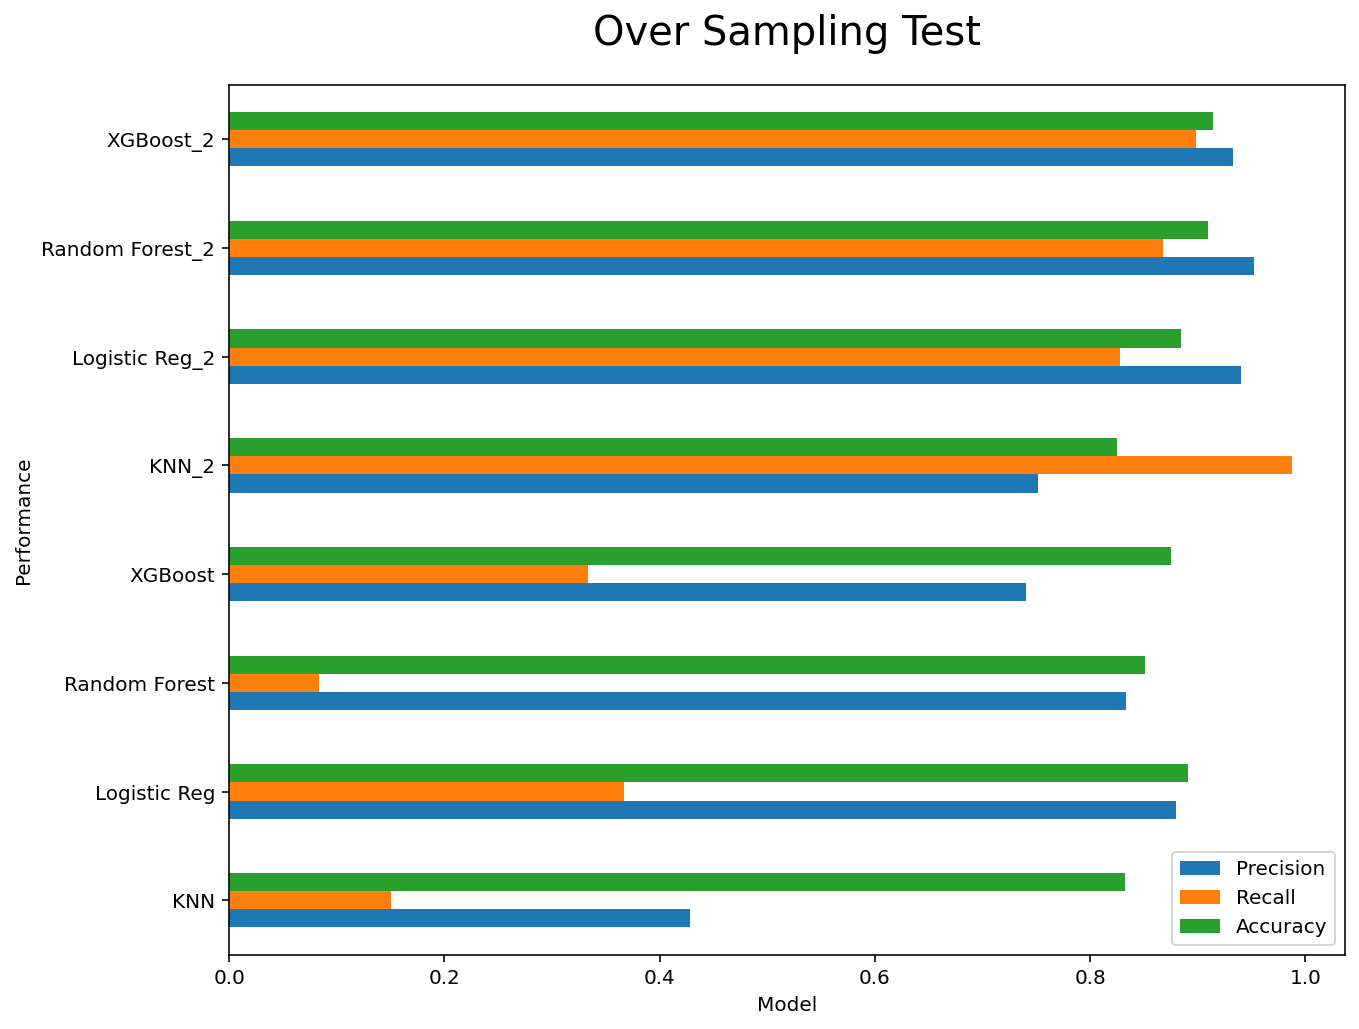

In [136]:
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])

tmp.plot(kind='barh')
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

- over smapling 이후 정확도, 재현율, 정밀도 모두 상승하였다.
- 재현율이 특히 많이 상승하였다.